# Анализ бизнес-показателей 

**Задача**

Разобраться в причинах убытков компании, несмотря на огромные вложения в рекламу, и помочь компании выйти в плюс.

**План работы**

1. Изучение и предобработка данных: 
- проверка типов данных; 
- проверка на пропуски; 
- проверка на дубликаты.

2. Подготовка кода для работы с данными.


3. Проведение исследовательского анализа:
- формирование пользовательских профилей;
- определение минимального и максимального дня привлечения; 
- анализ стран, из которых приходят пользователи;
- анализ устройств, которые используют пользователи;
- анализ рекламных источников привлечения.

4. Маркетинговый анализ:
- анализ распредления трат по источникам;
- изменение метрик во времени.

5. Оценка окупаемости рекламы:
- анализ общей окупаемости;
- анализ окупаемости с разбивкой по рекламным каналам;
- анализ окупаемости с разбивкой по странам;
- анализ графиков конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

6. Выводы.

**В результате работы мы ответим на вопросы:**
1. Окупается ли реклама в целом?
2. Какие устройства, страны и каналы могут снижать окупаемость рекламы?
3. Чем могут быть вызваны проблемы окупаемости?

## Изучение и предобработка данных

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# определяем переменные для датасетов
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'), # покупки
    pd.read_csv('/datasets/costs_info_short.csv') # рекламные расходы
)

### Таблица посещений сайта

In [3]:
display(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


**Описание данных**

- `User Id` — уникальный идентификатор пользователя;
- `Region` — страна пользователя;
- `Device` — тип устройства пользователя;
- `Channel` — идентификатор источника перехода;
- `Session Start` — дата и время начала сессии;
- `Session End` — дата и время окончания сессии.

In [4]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет, но не все типы данных соответствуют.

In [6]:
# приведем данные о времени сессий к типу datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
# проверим таблицу на явные дубликаты
visits.duplicated().sum()

0

In [8]:
# проверим отдельные столбцы на неявные дубликаты
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [9]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [10]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Дубликатов не обнаружено.

### Таблица с информацией о покупках

In [11]:
display(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


**Описание данных**

- `User Id` — уникальный идентификатор пользователя;
- `Event Dt` — дата и время покупки;
- `Revenue` — сумма заказа.

In [12]:
# исправим написание названий колонок в таблице и выведем информацию о таблице
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков нет, но необходимо изменить тип данных в столбце `event_dt`.

In [13]:
# приведем данные о времени покупок к типу datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
# проверим таблицу на явные дубликаты
orders.duplicated().sum()

0

### Таблица с информацией о расходах на рекламу

In [15]:
display(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


**Описание данных**

- `dt` — дата проведения рекламной кампании;
- `Channel` — идентификатор рекламного источника;
- `costs` — расходы на эту кампанию.

In [16]:
# исправим написание названий колонок в таблице и выведем информацию о таблице
costs.columns = costs.columns.str.lower()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков не обнаружено, поменяем тип данных для дат проведения рекламных компаний.

In [17]:
# приведем данные о времени рекламных компаний к типу datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [18]:
# проверим таблицу на явные дубликаты
costs.duplicated().sum()

0

In [19]:
# проверим отдельные столбцы на неявные дубликаты
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Данные подготовлены к анализу.

## Подготовка кода для анализа

Сразу подготовим функции для дальнейшей работы с данными.

### Функция для создания пользовательских профилей

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета удержания

In [21]:
# функция для расчета удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем сырые данные для расчета удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета конверсии

In [22]:
# функция для расчета конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую ячейку в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV и ROI

In [23]:
# функция для расчета LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую ячейку в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаем размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаем сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвертый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ

### Профили пользователей и даты привлечения

In [28]:
# создадим профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Определим минимальную и максимальную дату привлечения пользователей.

In [29]:
# определяем минимальную дату привлечения пользователей
min_analysis_date = profiles['first_ts'].min()

# датой наблюдений определяем 1 ноября 2019 года
import datetime
observation_date = datetime.date(2019, 11, 1)

# задаем горизонт анализа две недели, так как это заложенный в бизнес-план срок окупаемости пользователя
analysis_horizon = 14

# максимально возможная дата привлечения с учетом горизонта
max_analysis_date = observation_date - timedelta(days=analysis_horizon - 1)

### Разделение по странам

Посмотрим, из каких стран приходят пользователи приложения и на какую страну приходится больше всего платящих пользователей.

In [30]:
# отберем платящих пользователей
countries = (profiles
             .query('payer == True')
             .groupby(['region'])
             .agg({'user_id': 'count'})
             .sort_values(by='user_id', ascending=False)
             .rename(columns={'user_id': 'paying'})
            )

# отберем неплатящих пользователей
countries_np = (profiles
             .query('payer == False')
             .groupby(['region'])
             .agg({'user_id': 'count'})
             .sort_values(by='user_id', ascending=False)
             .rename(columns={'user_id': 'non_paying'})
            )

# объединим таблицы и посчитаем долю платящих
countries = countries_np.join(countries)
countries['ratio'] = round((countries['paying'] / (countries['non_paying'] + countries['paying']) * 100), 2)
countries = countries.sort_values(by='paying', ascending=False).reset_index()
display(countries)

,region,non_paying,paying,ratio
0,United States,93100,6902,6.90
1,UK,16875,700,3.98
2,France,16787,663,3.80
3,Germany,14365,616,4.11


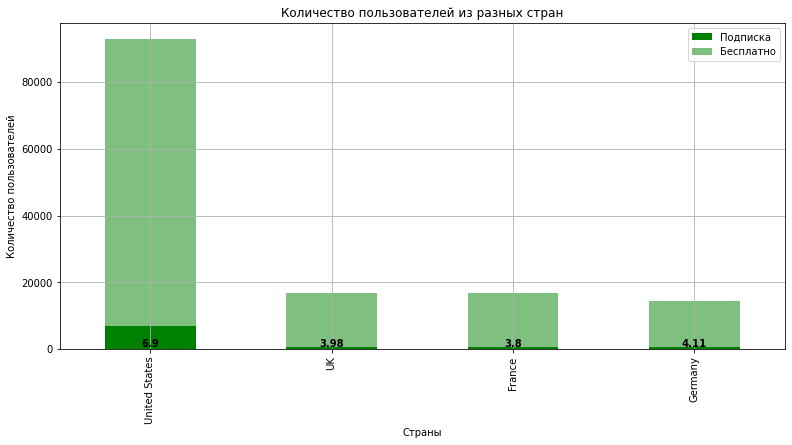

In [31]:
ax=countries.plot(x='region', y='paying', figsize=(13,6), style='o-', kind='bar', label='Подписка', color='green')
countries.plot(x='region', y='non_paying', grid=True, figsize=(13,6), style='o-', kind='bar', label='Бесплатно', color='green', alpha=0.5, ax=ax)

plt.bar(countries['region'], countries['ratio'], width=.5)
for i, val in enumerate(countries['ratio'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', weight='bold')

plt.xlabel('Страны')
plt.ylabel('Количество пользователей')
plt.title("Количество пользователей из разных стран")
plt.show()

In [32]:
# def get_payers(profiles, column=[]):
#     payers = (profiles
#              .query('payer == True')
#              .groupby(column)
#              .agg({'user_id': 'count'})
#              .sort_values(by='user_id', ascending=False)
#              .rename(columns={'user_id': 'paying'})
#             )
    
#     non_payers = (profiles
#              .query('payer == False')
#              .groupby(column)
#              .agg({'user_id': 'count'})
#              .sort_values(by='user_id', ascending=False)
#              .rename(columns={'user_id': 'non_paying'})
#             )
#     payers = non_payers.merge(payers, on=column)
#     payers['ratio'] = round((payers['paying'] / (payers['non_paying'] + payers['paying']) * 100), 2)
#     payers = payers.sort_values(by='paying', ascending=False).reset_index()
#     return payers

Пользователи приложения — жители США, Великобритании, Франции и Германии. Наиболее популярно приложение у пользователей из США — более 66% всех пользователей оттуда. Но мы видим, что доля пользователей, оплативших подписку, во всех странах очень мала:

- 6,9% в США;
- 4,11% в Германии;
- 3,98% в Великобритании;
- 3,8% во Франции.

Посмотрим, как распределяются пользователи с подпиской и без нее в зависимости от используемого устройства.

### Разделение по устройствам

In [33]:
# отберем платящих пользователей
devices = (profiles
             .query('payer == True')
             .groupby(['device'])
             .agg({'user_id': 'count'})
             .sort_values(by='user_id', ascending=False)
             .rename(columns={'user_id': 'paying'})
             .reset_index()
            )

# отберем неплатящих пользователей
devices_np = (profiles
             .query('payer == False')
             .groupby(['device'])
             .agg({'user_id': 'count'})
             .sort_values(by='user_id', ascending=False)
             .rename(columns={'user_id': 'non_paying'})
             .reset_index()
            )

# объединим таблицы и посчитаем долю платящих
devices = devices_np.merge(devices, on='device')
devices['ratio'] = round((devices['paying'] / (devices['non_paying'] + devices['paying']) * 100), 2)
devices = devices.sort_values(by='paying', ascending=False).reset_index(drop=True)
display(devices)

,device,non_paying,paying,ratio
0,iPhone,51097,3382,6.21
1,Android,32982,2050,5.85
2,Mac,28130,1912,6.36
3,PC,28918,1537,5.05


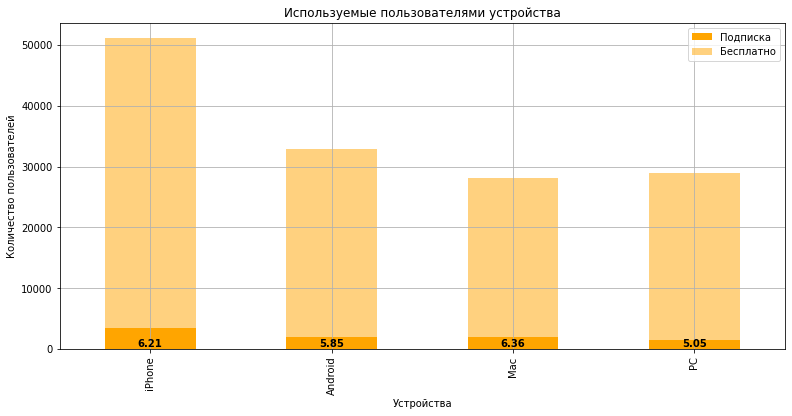

In [34]:
ax=devices.plot(x='device', y='paying', figsize=(13,6), style='o-', kind='bar', label='Подписка', color='orange')
devices.plot(x='device', y='non_paying', grid=True, figsize=(13,6), style='o-', kind='bar', label='Бесплатно', color='orange', alpha=0.5, ax=ax)

plt.bar(devices['device'], devices['ratio'], width=.5)
for i, val in enumerate(devices['ratio'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', weight='bold')

plt.xlabel('Устройства')
plt.ylabel('Количество пользователей')
plt.title("Используемые пользователями устройства")
plt.show()

Чаще всего приложение используют на iPhone, вторыми по популярности являются устройства на Android, третьими — Mac.
Наибольшая доля пользователей, купивших подписку, пользуется Mac (6,36%), немного отстают пользователи iPhone (6,21%), затем следуют пользователи устройств на Android (5,85%) и самыми плохо покупающими оказались пользователи персональных компьютеров (5,05%).

### Разделение по каналам привлечения

In [36]:
# отберем платящих пользователей
channels = (profiles
             .query('payer == True')
             .groupby(['channel'])
             .agg({'user_id': 'count'})
             .sort_values(by='user_id', ascending=False)
             .rename(columns={'user_id': 'paying'})
             .reset_index()
            )

# отберем неплатящих пользователей
channels_np = (profiles
             .query('payer == False')
             .groupby(['channel'])
             .agg({'user_id': 'count'})
             .sort_values(by='user_id', ascending=False)
             .rename(columns={'user_id': 'non_paying'})
             .reset_index()
            )

# объединим таблицы и посчитаем долю платящих
channels = channels_np.merge(channels, on='channel')
channels['ratio'] = round((channels['paying'] / (channels['non_paying'] + channels['paying']) * 100), 2)
channels = channels.sort_values(by='paying', ascending=False).reset_index(drop=True)
display(channels)

,channel,non_paying,paying,ratio
0,FaceBoom,25587,3557,12.20
1,TipTop,17683,1878,9.60
2,organic,55279,1160,2.06
3,WahooNetBanner,8100,453,5.30
4,AdNonSense,3440,440,11.34
5,RocketSuperAds,4096,352,7.91
6,LeapBob,8291,262,3.06
7,OppleCreativeMedia,8372,233,2.71
8,lambdaMediaAds,1924,225,10.47
9,YRabbit,4147,165,3.83


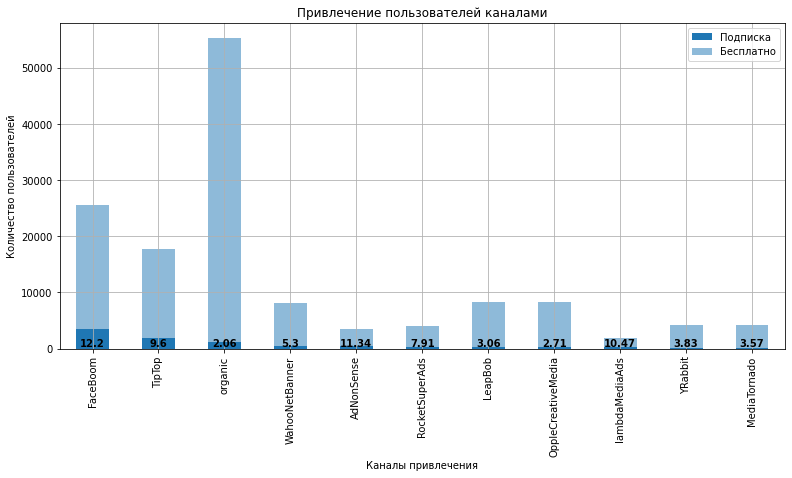

In [37]:
ax=channels.plot(x='channel', y='paying', figsize=(13,6), style='o-', kind='bar', label='Подписка')
channels.plot(x='channel', y='non_paying', grid=True, figsize=(13,6), style='o-', kind='bar', label='Бесплатно', alpha=0.5, ax=ax)

plt.bar(channels['channel'], channels['ratio'], width=.5)
for i, val in enumerate(channels['ratio'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', weight='bold')

plt.xlabel('Каналы привлечения')
plt.ylabel('Количество пользователей')
plt.title("Привлечение пользователей каналами")
plt.show()

Доля купивших подписку пользователей больше всего у рекламного канала FaceBoom, на втором месте – AdNonSence, на третьем – lambdaMediaAds.

### Выводы

Количество пользователей США составляет порядка 66% от всего числа пользователей, но тем не менее доля платных подписчиков приложения ненамного выше, чем у пользователей из Германии. Скорее всего, на привлечение пользователей из США тратится большая часть маркетингового бюджета, но эти затраты не окупаются. Далее мы посмотрим на распределение бюджета и проверим это предположение.

Больше всего пользователей использует iPhone, но доля покупающих подписку среди них меньше, чем среди пользователей Mac, платформе, занимающей третье место по популярности. Вторые по популярности у пользователей — устройства на Android имеют долю оплативших пользователей 5,85%.

Больше всего пользователей приходит «органически», но, ожидаемо, среди них наименьшая доля оплачивающих подписку, хотя, несмотря на это, по числу платящих пользователей organic занимает третье место среди каналов.

Из используемых каналов привлечения FaceBoom привлекает наибольшее число пользователей, у него же и самая высокая доля платных пользователей. На втором месте по числу привлеченных пользователей TipTop, но доля платных пользователей у него заметно меньше — 9,6%.

Сделать более обоснованные выводы об успешности определенных каналов мы сможем, когда посмотрим на маркетинговые затраты и окупаемость.

## Маркетинг

### Общие расходы

In [38]:
print('Общая сумма затрат на маркетинг за анализируемый период:', round(costs['costs'].sum(), 2))

Общая сумма затрат на маркетинг за анализируемый период: 105497.3


Посмотрим, как распределялись затраты в течение анализируемого полугодового периода.

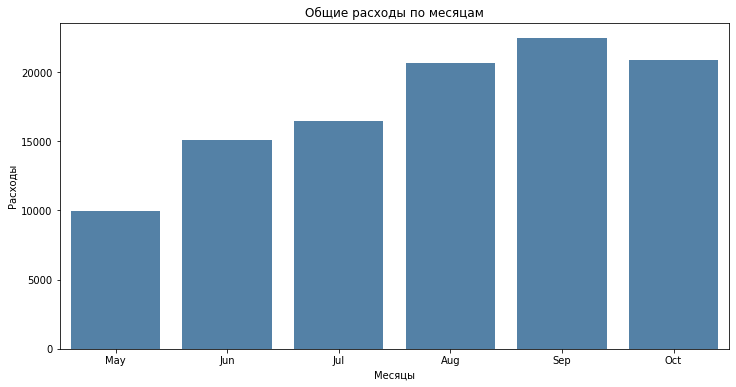

In [39]:
# сформируем таблицу общих затрат на маркетинг по месяцам
import random
cost_monthly = (profiles
             .groupby(['month'])
             .agg({'acquisition_cost': 'sum'})
             .rename(columns={'acquisition_cost': 'cost'})
             .reset_index()
            )
 
month_list = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

plt.figure(figsize = (12, 6))
ax = sns.barplot(x="month", y="cost", data=cost_monthly, color='steelblue')
ax.set_xticklabels(month_list)
plt.title('Общие расходы по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

Мы видим постепенный рост затрат на рекламу, пик которого пришелся на сентябрь. С октября расходы начали сокращать, видимо, заметив, что реклама не работает должным образом.

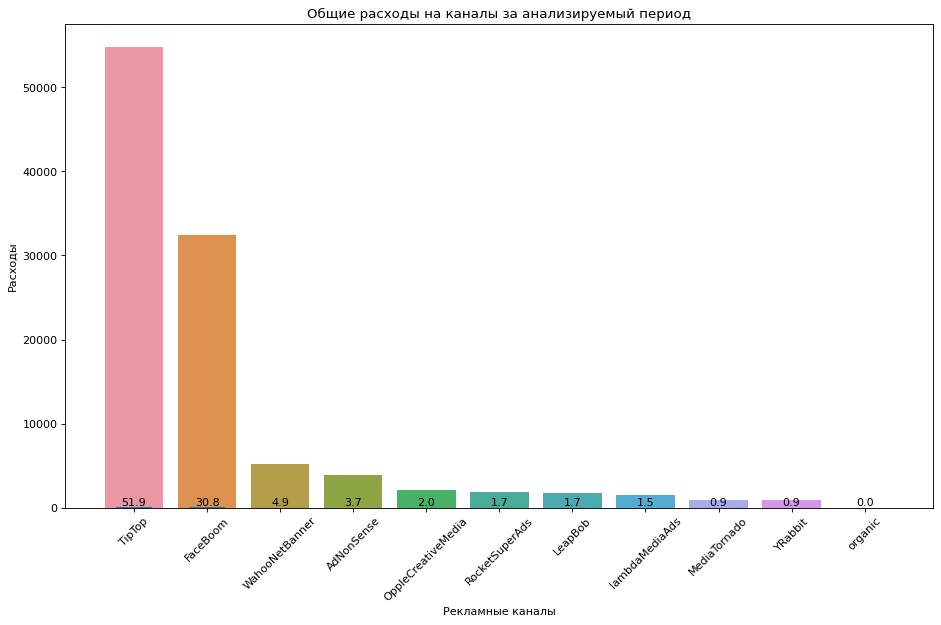

In [40]:
# сформируем таблицу общих затрат на маркетинг по каналам привлечения
channels_cost = (profiles
             .groupby(['channel'])
             .agg({'acquisition_cost': 'sum'})
             .sort_values(by='acquisition_cost', ascending=False)
             .rename(columns={'acquisition_cost': 'cost'})
             .reset_index()
            )
channels_cost['percent'] = round((channels_cost['cost'] / channels_cost['cost'].sum() * 100), 1)

# построим график
plt.figure(figsize = (14, 8), dpi= 80)
ax = sns.barplot(x="channel", y="cost", data=channels_cost)
ax.set_xticklabels(channels_cost['channel'], rotation=45)
plt.bar(channels_cost['channel'], channels_cost['percent'], width=.5)

for i, val in enumerate(channels_cost['percent'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom')

plt.title('Общие расходы на каналы за анализируемый период')
ax.set_xlabel('Рекламные каналы')
ax.set_ylabel('Расходы')
plt.show()

Больше половины от общих затрат за анализируемый период приходится на канал TipTop, при этом доля купивших подписку из привлеченных им пользователей всего 9,6%, а общее число привлеченных пользователей меньше, чем у FaceBoom. 

Второй по объему затрат — FaceBoom, доля платных пользователей у которого самая большая из всех каналов — 12,2%, и общее число привлеченных пользователей выше.

Посмотрим, как менялись расходы на каждый из каналов в течение анализируемого периода.

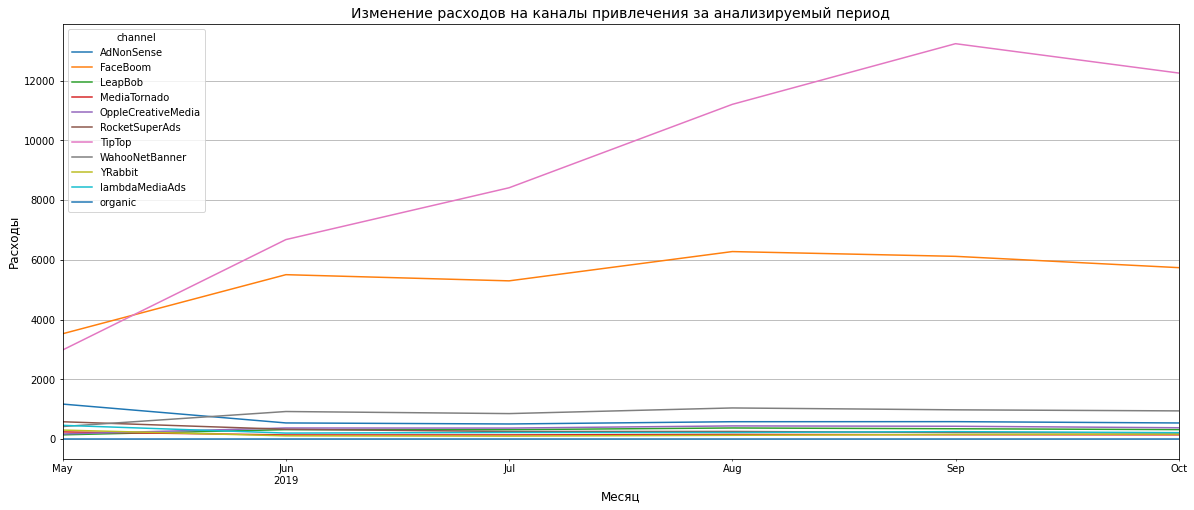

In [41]:
channels_cost_per_month = profiles.pivot_table(
    index=['month'], 
    columns=['channel'], 
    values='acquisition_cost', 
    aggfunc='sum',
)

channels_cost_per_month.plot(grid=True, figsize=(20, 8))
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Расходы', fontsize=12)
plt.title('Изменение расходов на каналы привлечения за анализируемый период', fontsize=14)
plt.show()

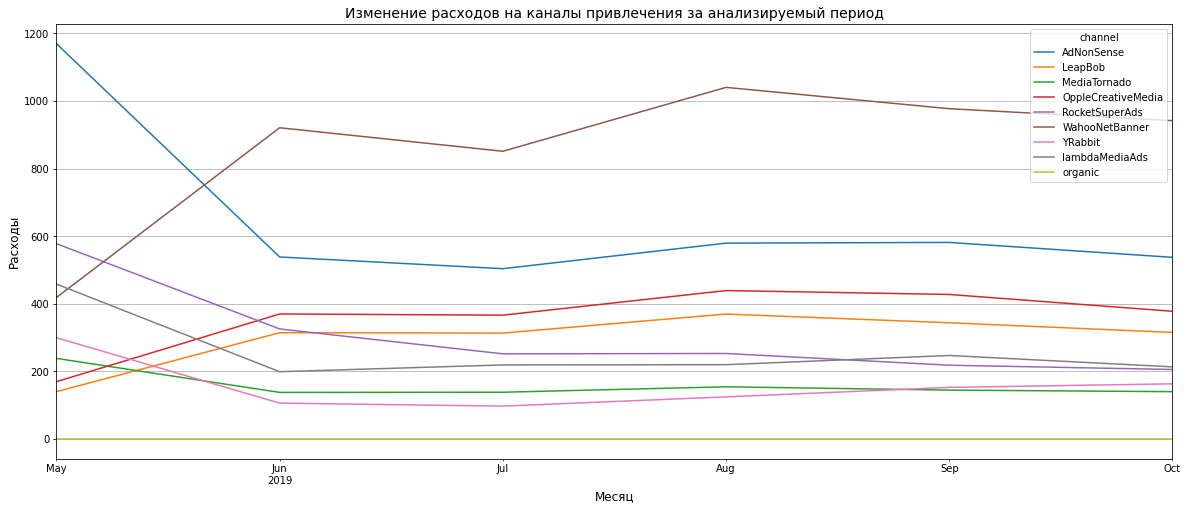

In [42]:
channels_cost_per_month = channels_cost_per_month.drop(['FaceBoom', 'TipTop'], axis=1)

channels_cost_per_month.plot(grid=True, figsize=(20, 8))
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Расходы', fontsize=12)
plt.title('Изменение расходов на каналы привлечения за анализируемый период', fontsize=14)
plt.show()

Мы видим, что расходы на TipTop росли на протяжении практически всего периода, достигли пикового значения в сентябре и затем стали снижаться. Это подтверждает полученный ранее график о распределении расходов на маркетинг по всему анализируемому периоду без разделения по каналам привлечения.

Менее интенсивно расли расходы на FaceBoom, но тем не менее это второй по объему затрат канал привлечения.

### Стоимость привлечения пользователей (CAC)

Посмотрим на стоимость привлечения пользователей. Для начала оценим среднюю стоимость для всего проекта.

In [43]:
channals_without_organic = profiles.query('channel != "organic"')
cost_m_general = channals_without_organic['acquisition_cost'].mean()
'Средняя стоимость привлечения пользователя для всего проекта: {}'.format(round(cost_m_general, 2))

'Средняя стоимость привлечения пользователя для всего проекта: 1.13'

Теперь рассчитаем среднюю стоимость по каналам привлечения.

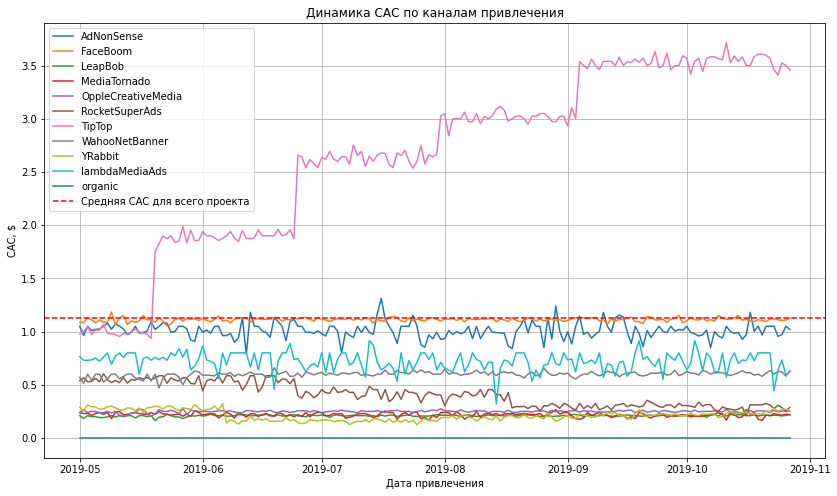

In [44]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(14, 8))
plt.axhline(y=cost_m_general, color='red', linestyle='--', label='Средняя CAC для всего проекта')
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend()
plt.show()

Самым дорогим оказался канал, вызывающий больше всех вопросов, — TipTop. Уже на этом этапе видно неэффективное использование этого канала, так как объемы привлечения пользователей очевидно не соответствуют высоким затратам.

### Выводы

Расходы на маркетинг в компании росли до сентября включительно, но ставка была сделана не на те каналы. Затраты увеличивались в основном за счет двух каналов: TipTop, на чью долю пришлось более половины затрат за анализируемый период, и FaceBoom.

Ориентируясь на построенный ранее график привлечения пользователей каналами, мы можем с уверенностью сказать, что решение вложить больше половины маркетингового бюджета в TipTop было неверным — канал показывает не только второе место по общему числу привлеченных пользователей, но и всего лишь на четвертом месте по доле пользователей, купивших подписку.

С FaceBoom вывод не такой однозначный — на первый взгляд, его показатели самые лучшие среди имеющихся каналов, но CAC заметно выше средней по проекту, что может привести к тому, что затраты на использование этого канала не будут окупаться. В случае с этим каналом, AdNonSence и lambdaMediaAds необходимо посмотреть на ROI, что мы и сделаем далее.

## Окупаемость рекламы

### Общая окупаемость рекламы

Для начала посмотрим на общие показатели по проекту.

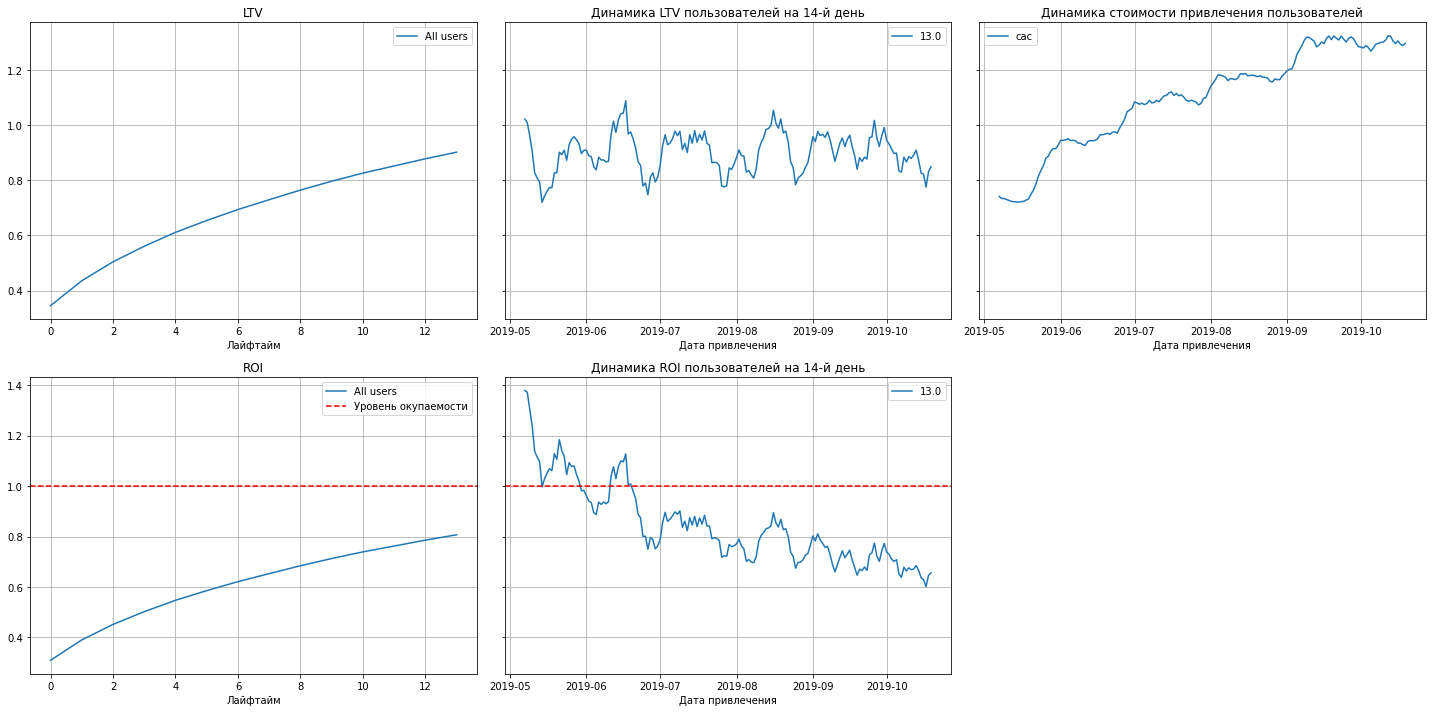

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    channals_without_organic, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

По получившимся графикам мы можем сделать выводы:
- заметны регулярные спады LTV во второй половине каждого месяца;
- CAC растет с середины мая;
- при этом реклама не окупается — к концу второй недели ROI не многим больше 80%;
- в динамике мы видим как в июне ROI опускается ниже уровня окупаемости.

Проанализируем все характеристики пользователей, чтобы лучше понять причину.

### Окупаемость рекламы с разбивкой по каналам

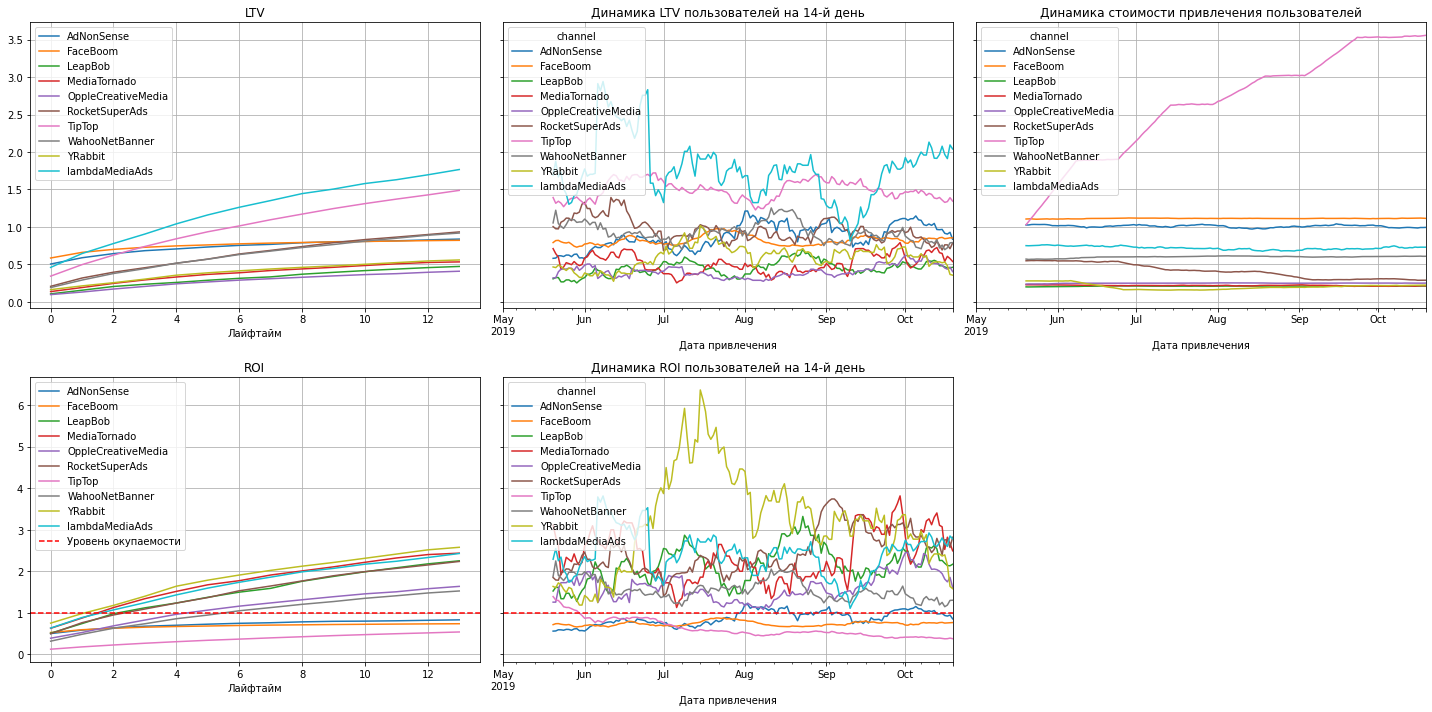

In [46]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    channals_without_organic, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=20
) 

Выводы по получившимся графикам:
- CAC для большинства каналов был стабильным, изменения можно заметить лишь у двух: рост у TipTop и снижение у RocketSuperAds;
- самые затратные каналы, оказались неокупаемыми: TipTop, FaceBoom, AdNonSence стабильно не пересекают уровень окупаемости.

### Окупаемость рекламы с разбивкой по странам

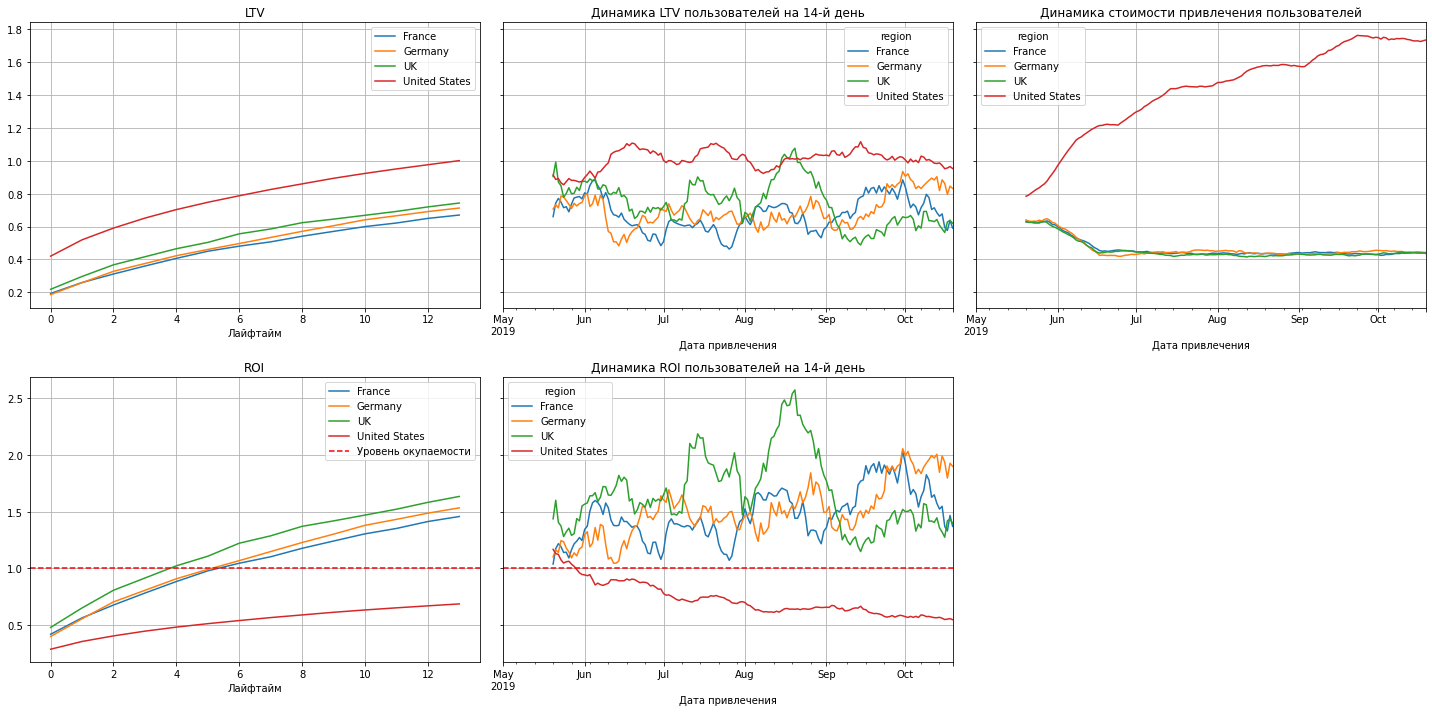

In [47]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    channals_without_organic, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=20
) 

Выводы:

- окупаются все страны кроме США, лучше всех окупаются пользователи из Великобритании;
- CAC для США увеличивался на протяжении практически всего анализируемого периода.

### Окупаемость рекламы с разбивкой по устройствам

Проверим окупаемость с разбивкой по устройствам, чтобы получить полную картину происходящего. 

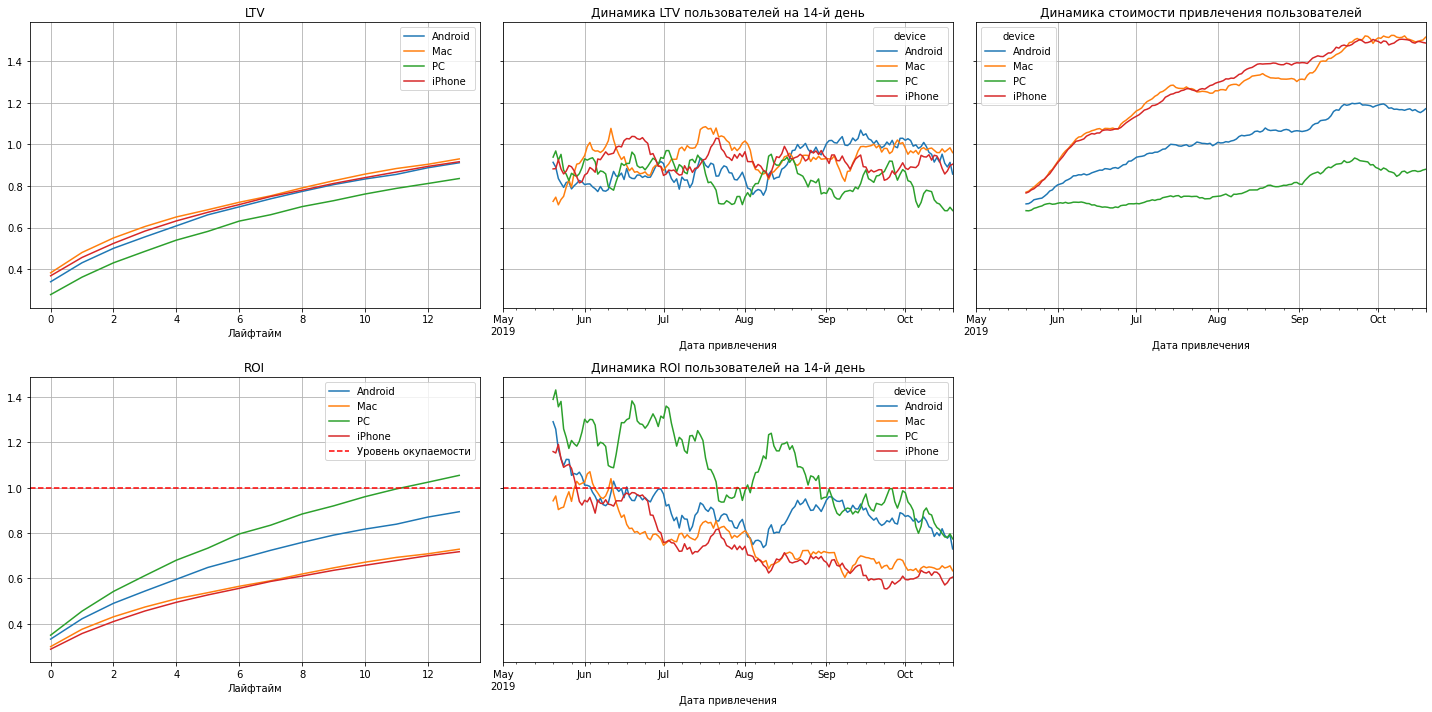

In [48]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    channals_without_organic, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=20
) 

Выводы:

- у iPhone, Mac и Android проблемы с окупаемостью, окупаются только PC;
- CAC растет для всех устройств, но особенно заметно для устройств Apple.

### Промежуточный вывод

Реклама приложения в целом не окупается, CAC растет, поэтому мы более подробно рассмотрели окупаемость по всем параметрам пользователей.

Неокупаемыми оказались каналы с самой высокой средней стоимостью привлечения пользователя:
- канал TipTop, будучи на втором месте по общему числу привлеченных пользователей (за исключением «органических»), имеет долю оплативших подписку пользователей всего лишь чуть более 9%, но при этом большая часть бюджета была отдана именно этому каналу (судя по всему, канал работает с американской аудиторией — CAC для него растет так же, как и для пользователей из США);
- канал FaceBoom на первом месте по числу привлеченных пользователей в целом и доле оплативших подписку пользователей, но также не преодолевает уровень окупаемости;
- канал AdNonSense на втором месте по доле заплативших пользователей, но общее число привлеченных пользователей у него небольшое, что вкупе с высоким CAC не дает выйти на окупаемость.

Из стран заметно отстает США — пользователи оттуда стабильно не окупаются. 

Скорее всего, решение о повышении объема инвестиций в канал TipTop было принято из-за высокой доли платных подписчиков приложения из США по сравнению с другими странами. И, следуя этой логике, вложения могли бы окупиться, но этого не произошло. 

Мы посмотрели также на окупаемость рекламы по устройствам. Несмотря на популярность iPhone, пользователи с iPhone и Mac стабильно не окупаются, аналогичная ситуация с устройствами на Android. Несмотря на то, что платящих пользователей PC меньше всего, это единственная окупающаяся платформа.

Посмотрим на конверсию и удержание.

### Конверсия и удержание с разбивкой по устройствам

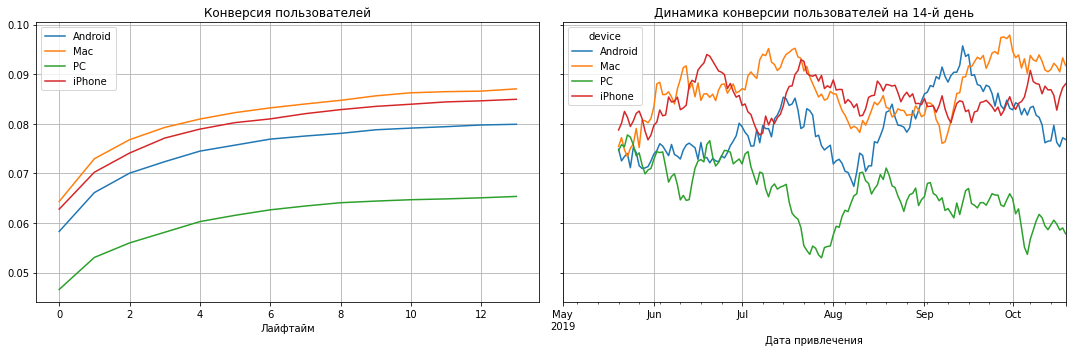

In [49]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    channals_without_organic, orders, observation_date, analysis_horizon, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon, window=20) 

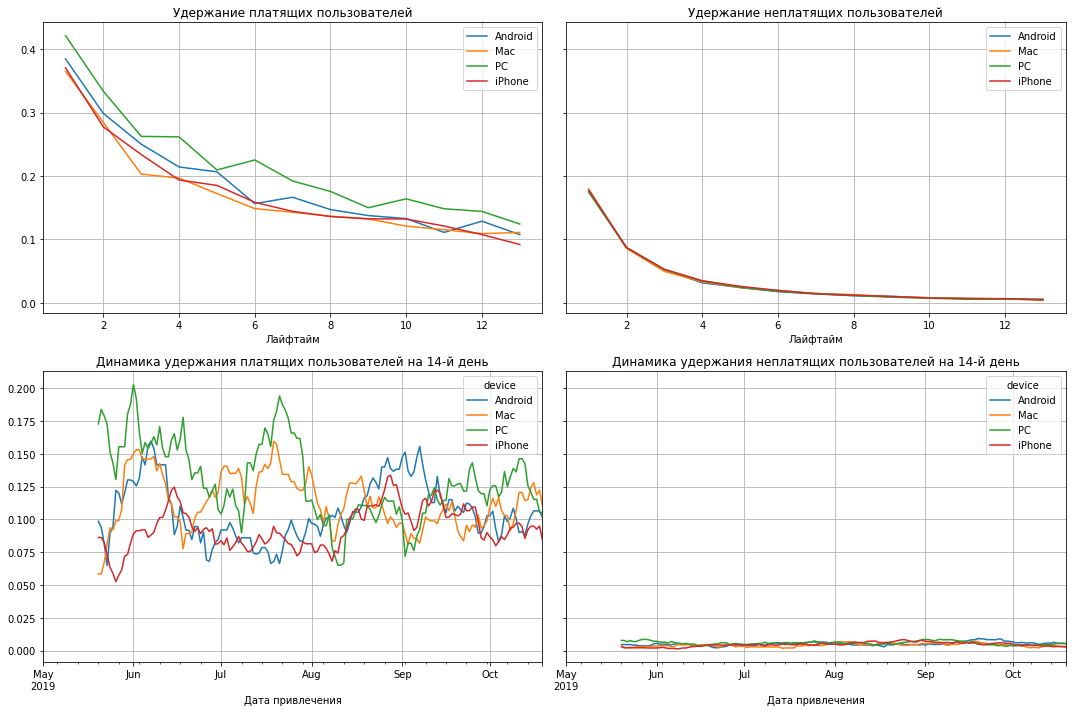

In [50]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    channals_without_organic, visits, observation_date, analysis_horizon, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, analysis_horizon, window=20) 

Мы видим хорошую конверсию у пользователей Mac и iPhone, но удержание платящих пользователей этих устройств крайне низкое. При этом пользователи PC плохо конвертируются, но хорошо удерживаются.

### Конверсия и удержание с разбивкой по странам

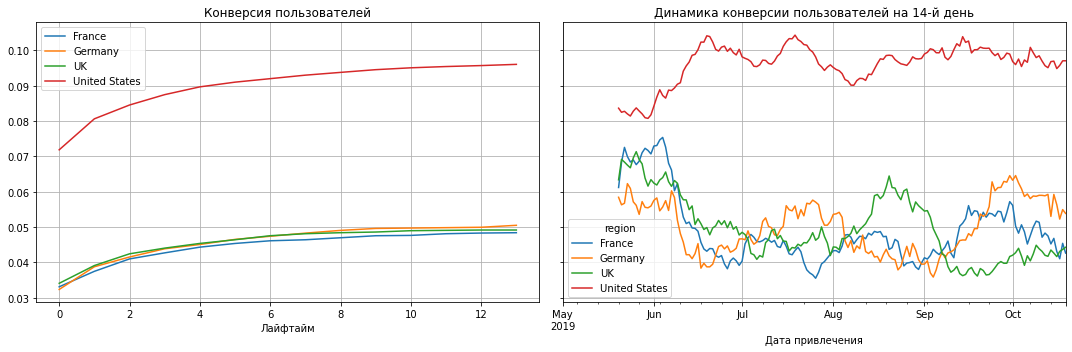

In [51]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    channals_without_organic, orders, observation_date, analysis_horizon, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon, window=20) 

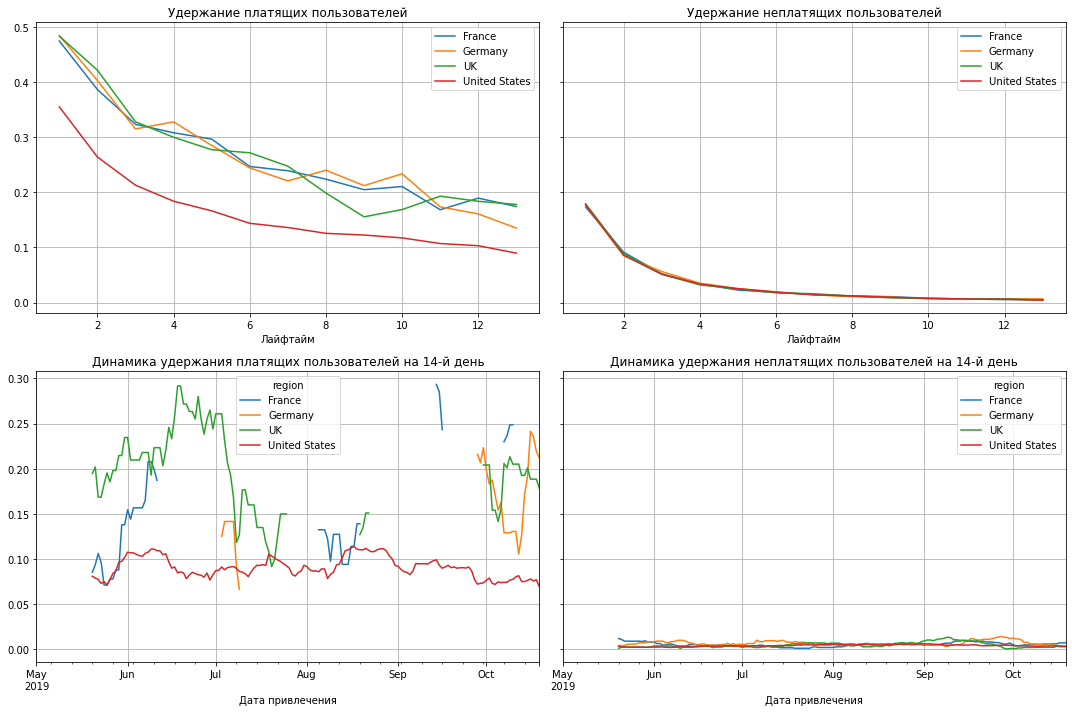

In [52]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    channals_without_organic, visits, observation_date, analysis_horizon, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, analysis_horizon, window=20) 

Конверсия пользователей из США бьет рекорды, но удержание этих пользователей бьет уже отрицательные рекорды. Лучше всех удерживаются пользователи из Великобритании и Франции.

### Конверсия и удержание с разбивкой по рекламным каналам

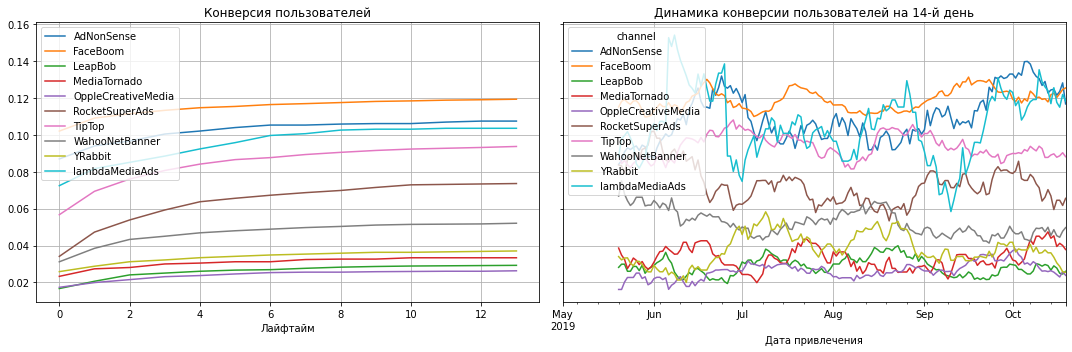

In [53]:
# смотрим конверсию с разбивкой по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    channals_without_organic, orders, observation_date, analysis_horizon, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon, window=20) 

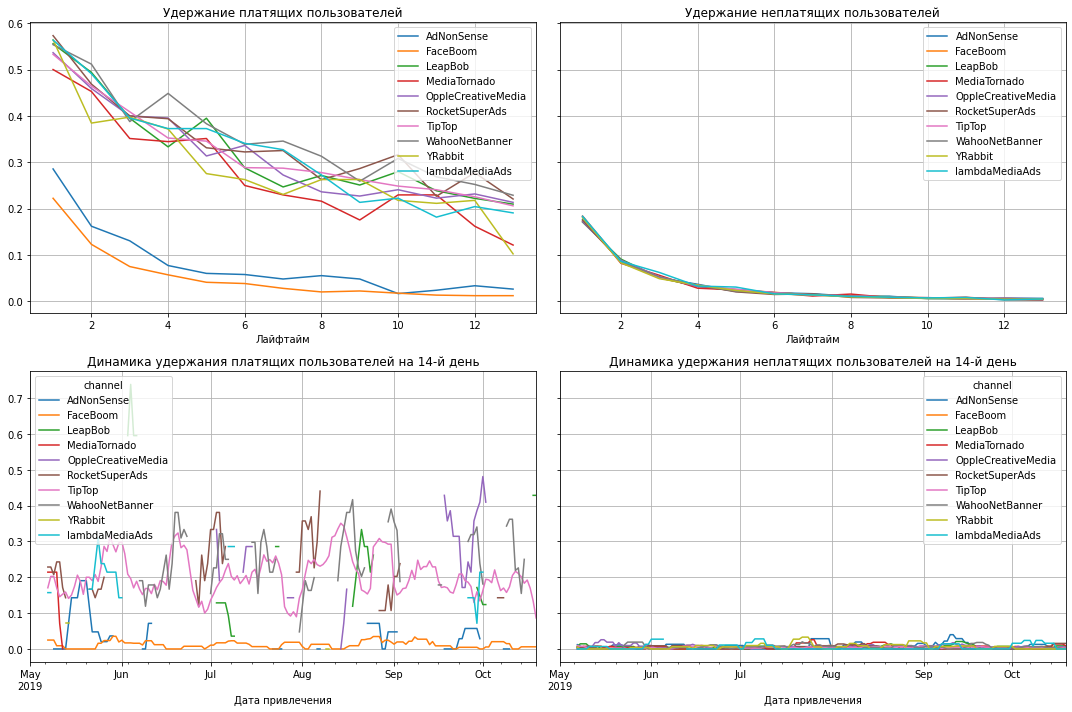

In [54]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    channals_without_organic, visits, observation_date, analysis_horizon, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 

Конверсия пользователей, пришедших через канал FaceBoom, самая высокая, на втором месте — канал AdNonSence, но оба канала примерно одинаково плохо удерживают платящих пользователей.

### Анализ пользовательских метрик

Помимо проблем с рекламой, у продукта есть проблемы с удержанием пользователей. Посмотрим на пользовательские метрики, чтобы проверить данные.

In [55]:
# сформируем таблицу с более подробными данными о сессиях
sessions = visits.copy(deep=True)
sessions['session_year'] = sessions['session_start'].dt.year
sessions['session_month'] = sessions['session_start'].dt.month
sessions['session_week'] = sessions['session_start'].dt.isocalendar().week
sessions['session_date'] = sessions['session_start'].dt.date

In [56]:
# посчитаем количество уникальных пользователей за месяц, неделю и день
mau_total = int(
    sessions.groupby('session_month')
    .agg({'user_id': 'nunique'})
    .mean()
)

dau_total = int(
    sessions.groupby('session_date')
    .agg({'user_id': 'nunique'})
    .mean()
)

wau_total = int(
    sessions.groupby(['session_year', 'session_week'])
    .agg({'user_id': 'nunique'})
    .mean()
)

# рассчитаем sticky factor для недели и месяца
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

print('Количество уникальных пользователей в месяц (MAU):', mau_total)
print('Количество уникальных пользователей в неделю (WAU):', wau_total)
print('Количество уникальных пользователей в день (DAU):', dau_total)
print('Недельный sticky factor:', sticky_wau)
print('Месячный sticky factor:', sticky_mau)

Количество уникальных пользователей в месяц (MAU): 28989
Количество уникальных пользователей в неделю (WAU): 8353
Количество уникальных пользователей в день (DAU): 1684
Недельный sticky factor: 20.16042140548306
Месячный sticky factor: 5.809100003449584


Пользователи быстро теряют интерес к приложению — месячный sticky factor меньше 6%, а это значит, что большинство пользователей не заходит в приложение больше двух раз. Проверим среднее число сессий на пользователя в месяц.

In [57]:
# сформируем таблицу с количеством сессий уникальных пользователей за месяц
sessions_per_user = sessions.groupby(['session_month']).agg(
    {'user_id': ['count', 'nunique']})

sessions_per_user.columns = ['n_sessions', 'n_users']

# рассчитаем среднее кол-во сессий на пользователя
sessions_per_user['sessions_per_user'] = (
     sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

sessions_per_user

,n_sessions,n_users,sessions_per_user
session_month,,,
5,45765,27111,1.688060
6,44623,26042,1.713501
7,47970,26672,1.798515
8,55996,31064,1.802601
9,56628,31871,1.776788
10,58919,31175,1.889944


Мы видим, что наше предположение относительно числа сессий на каждого пользователя в месяц оказалось верным. 

Посмотрим заодно на ASL (среднюю продолжительность сессии), чтобы убедиться, что проблема не в технических сбоях приложения.

In [58]:
# считаем ASL
sessions['session_duration_sec'] = (
    sessions['session_end'] - sessions['session_start']
).dt.seconds

round(sessions['session_duration_sec'].mean())

1800

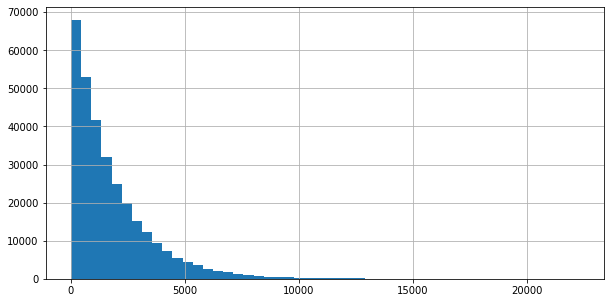

In [59]:
# строим гистограмму
sessions['session_duration_sec'].hist(figsize=(10, 5), bins=50)
plt.show() 

In [60]:
# рассчитываем медианную продолжительность сессии
round(sessions['session_duration_sec'].median())

1244

Длительность сессий кажется вполне нормальной для развлекательного приложения — пользователи проводят в нем в среднем 20-30 минут за сессию. Технических ошибок у приложения не так уж и много, поэтому мы не можем утверждать, что приложение непопулярно из-за них.

## Выводы

Реклама в целом не окупается, а стоимость привлечения пользователя неуклонно растет. По результатам проведенного анализа мы можем выделить несколько важных факторов.

**1. Рекламные кампании.**

- Можно назвать неудачным решение вложить большую часть бюджета в рекламный канал TipTop — несмотря на то, что он, судя по всему, привлекает клиентов из США, доля платящих пользователей среди которых выше, чем в остальных странах, именно этот канал всего на четвертом месте по доле платящих пользователей и второй по объему привлечения в целом. 


- FaceBoom — топовый канал по числу привлеченных пользователей и доле платящих пользователей, но высокая стоимость привлечения, а также крайне низкое удержание нивелируют его полезность для проекта. Судя по метрикам, также работает с американской аудиторией.


- Оба этих канала не оправдывают таких больших маркетинговых затрат, бюджет на работу с ними стоит сократить и распределить оставшиеся деньги среди других, показывающих в данный момент более высокий уровень окупаемости. 


- Третий неокупающийся канал — AdNonSense, он находится на четвертом месте по затратам, при этом имеет весьма скромные показатели по общему числу привлеченных пользователей и довольно высокую стоимость привлечения пользователя. От использования этого канала можно отказаться.


- Пользователи из США не оправдывают возложенных надежд и вложенных в их привлечение денег, поэтому не стоит так фокусироваться на них. Гораздо более окупаемыми оказываются пользователи из Великобритании и Германии, поэтому логичнее будет снизить затраты на США и распределить высвободившийся бюджет между европейскими странами.


- Что касается устройств, здесь, возможно, сыграли роль слабое удержание и неокупаемость пользователей из США, где устройства Apple наиболее популярны. Сокращение этого потока пользователей приведет к выравниванию ситуации и повышению окупаемости устройств Apple. А также может влиять конкуренция среди приложений — на мобильных устройствах вариантов проведения досуга гораздо больше, и если приложение кажется пользователям скучным, они предпочтут другое.


**2. Пользовательские метрики.**

Стоит обратить внимание на то, что пользователи почти не пользуются приложением чаще двух раз в месяц. 5,8% — очень скромный показатель sticky factor для развлекательного приложения. На графиках динамики удержания по странам и каналам видны «разрывы», когда пользователи вообще не открывали приложение. 

При этом мы не можем говорить о технических ошибках — средняя и медианная длительность сессии в рамках 20-30 минут, что вполне нормально для приложения такого типа. Скорее всего, пользователям не нравится контент и необходимо обратить внимание на наполнение, чтобы добиться лучших показателей удержания. Работа с контентом поможет улучшить динамику в целом.